#### My selected travel dates for this excercise are Jan. 1, 2017 - Jan. 10, 2017

In [1]:
# Dependencies
import pandas as pd
import numpy as np

import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
#from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float

from flask import Flask, jsonify

In [2]:
# Create a connection to database
engine = create_engine('sqlite:///hawaii.db')
conn = engine.connect()

# Create a session for later engine query
session = Session(engine)

In [3]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [4]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [5]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['Measurement', 'Station']

In [6]:
# Assign base classes to variables
Measurement = Base.classes.Measurement
Station = Base.classes.Station

In [7]:
precip = session.query(Measurement.date, Measurement.prcp).group_by(Measurement.date).\
                    having(Measurement.date.like('2016%')).all()
precip

# .order_by(Measurement.date.desc())

[('2016-01-01', 0.0),
 ('2016-01-02', 0.13),
 ('2016-01-03', 0.0),
 ('2016-01-04', 0.0),
 ('2016-01-05', 0.0),
 ('2016-01-06', 1.49),
 ('2016-01-07', 1.32),
 ('2016-01-08', 0.0),
 ('2016-01-09', 0.0),
 ('2016-01-10', 0.0),
 ('2016-01-11', 0.0),
 ('2016-01-12', 0.0),
 ('2016-01-13', 0.0),
 ('2016-01-14', 0.0),
 ('2016-01-15', 0.0),
 ('2016-01-16', 0.05),
 ('2016-01-17', 0.0),
 ('2016-01-18', 0.0),
 ('2016-01-19', 0.0),
 ('2016-01-20', 0.01),
 ('2016-01-21', 0.1),
 ('2016-01-22', 0.0),
 ('2016-01-23', 0.0),
 ('2016-01-24', 0.0),
 ('2016-01-25', 0.07),
 ('2016-01-26', 0.38),
 ('2016-01-27', 0.0),
 ('2016-01-28', 0.0),
 ('2016-01-29', 0.02),
 ('2016-01-30', 0.01),
 ('2016-01-31', 0.08),
 ('2016-02-01', 0.15),
 ('2016-02-02', 0.33),
 ('2016-02-03', 0.26),
 ('2016-02-04', 0.0),
 ('2016-02-05', 0.08),
 ('2016-02-06', 0.0),
 ('2016-02-07', 0.11),
 ('2016-02-08', 0.0),
 ('2016-02-09', 0.0),
 ('2016-02-10', 0.0),
 ('2016-02-11', 0.0),
 ('2016-02-12', 0.19),
 ('2016-02-13', 0.22),
 ('2016-02-14',

In [8]:
# Load the results into a dataframe and set the index to the date
precip_df = pd.DataFrame(precip, columns=['date', 'prcp'])
precip_df.set_index('date', inplace=True, )

precip_df.head()

,prcp
date,
2016-01-01,0.00
2016-01-02,0.13
2016-01-03,0.00
2016-01-04,0.00
2016-01-05,0.00


<IPython.core.display.Javascript object>


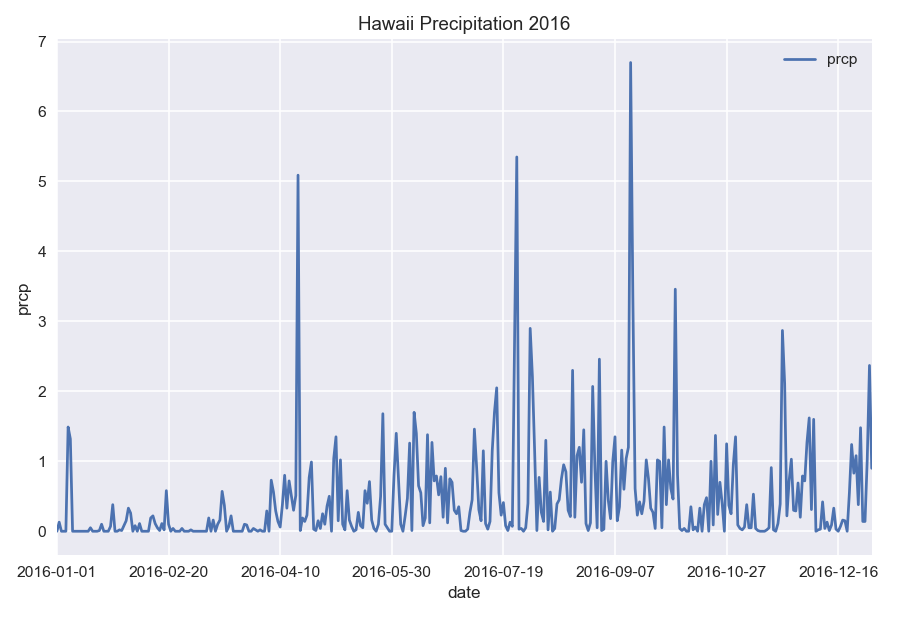

In [9]:
# plot precipitation for year before my trip
precip_df.plot(title="Hawaii Precipitation 2016")
plt.tight_layout()
plt.ylabel("prcp")
plt.show()

In [10]:
precip_df.describe()

,prcp
count,366.000000
mean,0.460601
std,0.759426
min,0.000000
25%,0.020000
50%,0.150000
75%,0.640000
max,6.700000


In [17]:
# query total number of stations
station_count = session.query(Station.station).count()
station_count

9

In [11]:
# List the stations and observation counts in descending order
station_activity = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
                        order_by(func.count(Measurement.tobs).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [12]:
# Identify most active station
station_most_active = session.query(Measurement.station, Station.name).group_by(Measurement.station).\
                        order_by(func.count(Measurement.tobs).desc()).first()
station_most_active

('USC00519281', 'MANOA LYON ARBO 785.2, HI US')

In [13]:
freq = session.query(Measurement.date, Measurement.tobs).group_by(Measurement.date).\
                    having(Measurement.date.like('2016%')).filter(Measurement.station == 'USC00519281').all()
freq


[('2016-01-01', 74),
 ('2016-01-02', 72),
 ('2016-01-03', 68),
 ('2016-01-04', 69),
 ('2016-01-05', 70),
 ('2016-01-06', 69),
 ('2016-01-07', 76),
 ('2016-01-08', 75),
 ('2016-01-09', 74),
 ('2016-01-10', 74),
 ('2016-01-11', 73),
 ('2016-01-12', 75),
 ('2016-01-13', 74),
 ('2016-01-14', 66),
 ('2016-01-15', 71),
 ('2016-01-16', 73),
 ('2016-01-17', 75),
 ('2016-01-18', 63),
 ('2016-01-19', 61),
 ('2016-01-20', 62),
 ('2016-01-21', 65),
 ('2016-01-22', 65),
 ('2016-01-23', 75),
 ('2016-01-24', 78),
 ('2016-01-25', 69),
 ('2016-01-26', 65),
 ('2016-01-27', 69),
 ('2016-01-28', 64),
 ('2016-01-29', 68),
 ('2016-01-30', 73),
 ('2016-01-31', 74),
 ('2016-02-01', 69),
 ('2016-02-02', 68),
 ('2016-02-03', 69),
 ('2016-02-04', 65),
 ('2016-02-05', 67),
 ('2016-02-06', 69),
 ('2016-02-07', 70),
 ('2016-02-08', 56),
 ('2016-02-09', 57),
 ('2016-02-10', 58),
 ('2016-02-11', 61),
 ('2016-02-12', 71),
 ('2016-02-13', 74),
 ('2016-02-14', 71),
 ('2016-02-15', 75),
 ('2016-02-16', 72),
 ('2016-02-17

In [14]:
# Load the results into a dataframe and set the index to the date
freq_df = pd.DataFrame(freq, columns=['date', 'tobs'])
freq_df.set_index('date', inplace=True, )

freq_df.head()

,tobs
date,
2016-01-01,74
2016-01-02,72
2016-01-03,68
2016-01-04,69
2016-01-05,70


<IPython.core.display.Javascript object>


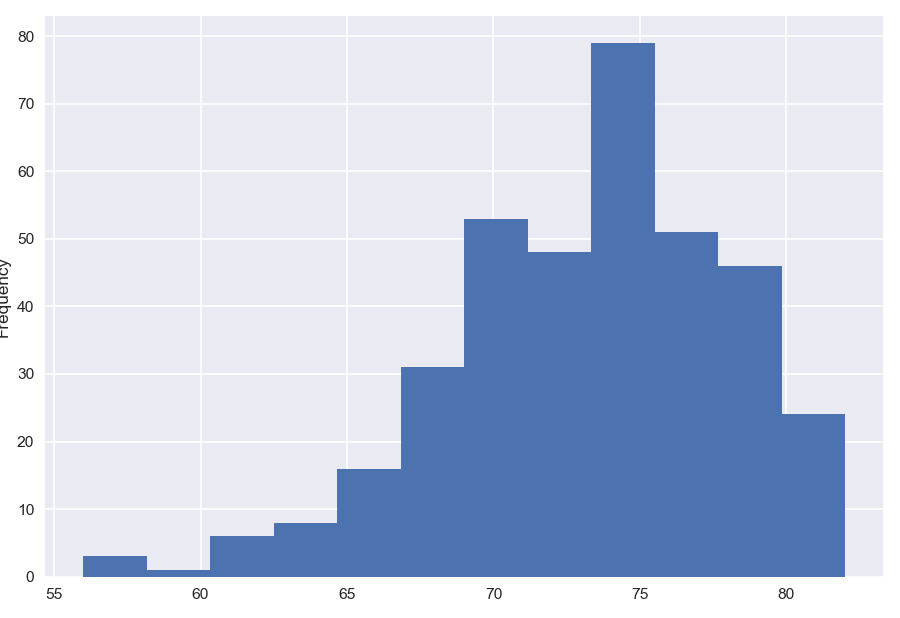

In [15]:
# plot precipitation for year before my trip
plt.hist(freq_df['tobs'], bins=12)
plt.tight_layout()
plt.ylabel("Frequency")
plt.show()


In [19]:
# trip temp calculation function
start_date = '2017-01-01'
end_date = '2017-01-10'

calc_temp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                            filter(Measurement.date >= start_date, Measurement.date <= end_date).all()
    
calc_temp

[(60, 77, 67.94736842105263)]

In [20]:
# Load the results into a dataframe and set the index to the date
calc_temp_df = pd.DataFrame(calc_temp, columns=['Min', 'Max', 'Avg'])
#calc_temp.set_index('date', inplace=True, )

calc_temp_df

,Min,Max,Avg
0,60,77,67.947368


<IPython.core.display.Javascript object>


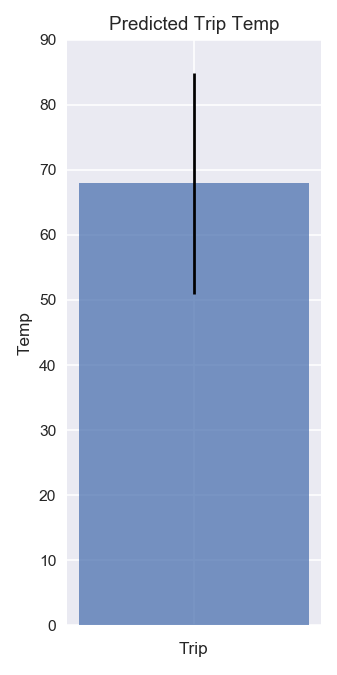

In [32]:
# Plot the min, avg, and max temperature
fig, ax = plt.subplots(figsize=(3,6))

yer = (calc_temp_df['Max']-calc_temp_df['Min'])
objects = ['']
ypos = np.arange(len(objects))

ax.bar(ypos, calc_temp_df['Avg'], width=.5, alpha=.75)
ax.set_xlabel("Trip")
ax.set_ylabel("Temp")
plt.ylim(0, 90, 5)
ax.errorbar(ypos, calc_temp_df['Avg'], yerr=yer, fmt="--", color="k")
plt.xticks(ypos, objects)
ax.set_title("Predicted Trip Temp")
fig.tight_layout()
fig.show()